In [ ]:
#Libraries Used
#Pandas
#Seaborn
#Sklearn
#WordCloud

In [19]:
import numpy as np #linear algebra

In [20]:
import pandas as pd #data processing,CSV file I/O

In [21]:
import os #os module

In [22]:
for dirname, _, filenames in os.walk('Titanic'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

Titanic\test.csv
Titanic\train.csv


In [24]:
df_train=pd.read_csv('Titanic/train.csv') #datset

In [25]:
#EXPLORATORY DATA ANALYSIS

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are missing values in coloumn cabin and age

In [28]:
import matplotlib.pyplot as plt

In [29]:
import seaborn as sns

In [30]:
sns.set()

Text(0.5, 1.0, 'The missing values heatmap')

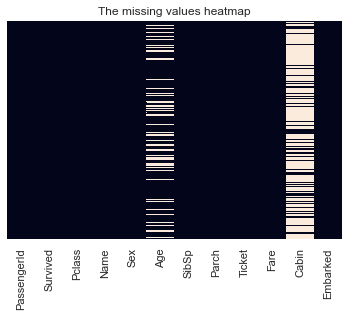

In [32]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)
plt.title('The missing values heatmap',fontsize=12)

DATA CLEANING

In [33]:
#dropping the column cabin

In [34]:
df_without_cabin=df_train.drop('Cabin',axis=1)

In [35]:
df_without_cabin.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Exploring the relationship between age and rest of the data to decide whether to fill the miing values or drop the data 

In [36]:
df_without_cabin['Age'].isnull().sum()

177

In [37]:
len(df_without_cabin['Age'])

891

In [38]:
percent_of_nulls=177*100/891

In [39]:
percent_of_nulls

19.865319865319865

<AxesSubplot:xlabel='Sex', ylabel='Age'>

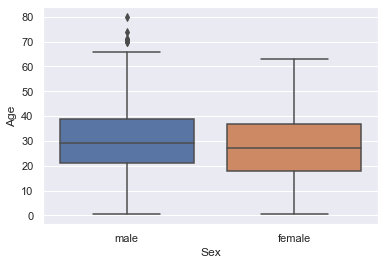

In [41]:
sns.boxplot(data=df_without_cabin,y='Age',x='Sex')

No relation between age and sex

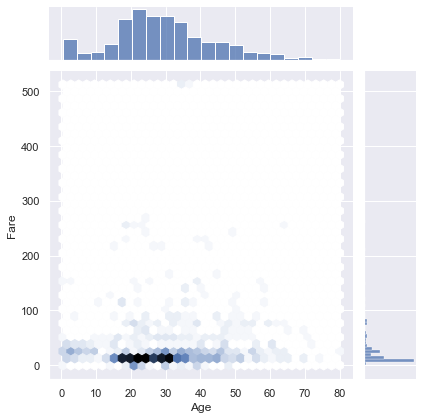

In [42]:
sns.jointplot(data=df_without_cabin,x='Age',y='Fare',kind='hex')

There is a relationship between age and fare , younger people buy cheaper tickets

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

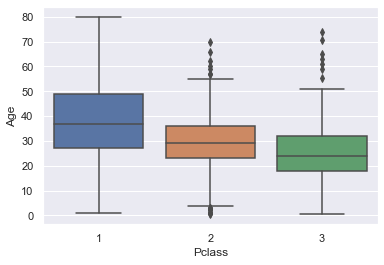

In [43]:
sns.boxplot(data=df_without_cabin,y='Age',x='Pclass')

the figure shows that people with age around 38-39 tends to buy expensive ticket in the first class whereas people with age around 29 tend to buy tickets in the second class however, people with age around 24 tend to buy cheater tickets

so, we can fill in the null values in the Age column by informations from pclass

In [45]:
def f(x):
    Age=x[0]
    Pclass=x[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
            return Age
            

In [46]:
df_without_cabin['Age']=df_without_cabin[['Age','Pclass']].apply(f,axis=1)

Text(0.5, 1.0, 'The missing values heatmap')

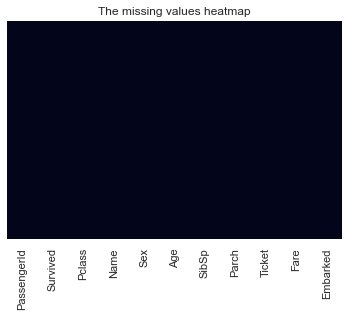

In [47]:
sns.heatmap(df_without_cabin.isnull(),yticklabels=False,cbar=False)
plt.title('The missing values heatmap',fontsize=12)

In [48]:
df_without_cabin.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [49]:
df_clean=df_without_cabin.dropna()

In [50]:
df_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

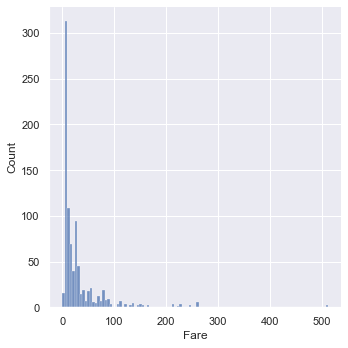

In [51]:
sns.displot(data=df_clean,x='Fare')

In [52]:
df_cleaned=df_clean[(df_clean['Fare']<200)]

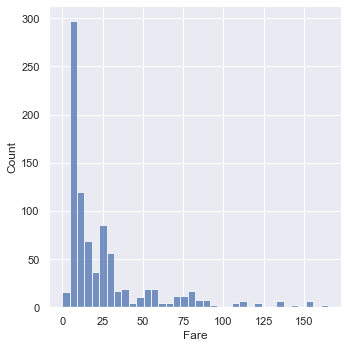

In [53]:
sns.displot(data=df_cleaned,x='Fare')

In [54]:
df_cleaned.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

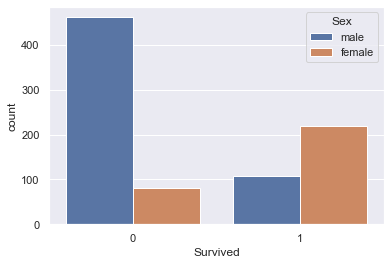

In [62]:
sns.countplot(data=df_cleaned,x='Survived',hue='Sex')

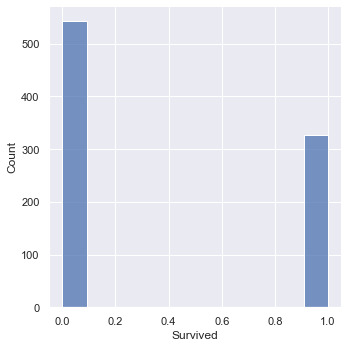

In [63]:
sns.displot(data=df_cleaned,x='Survived')

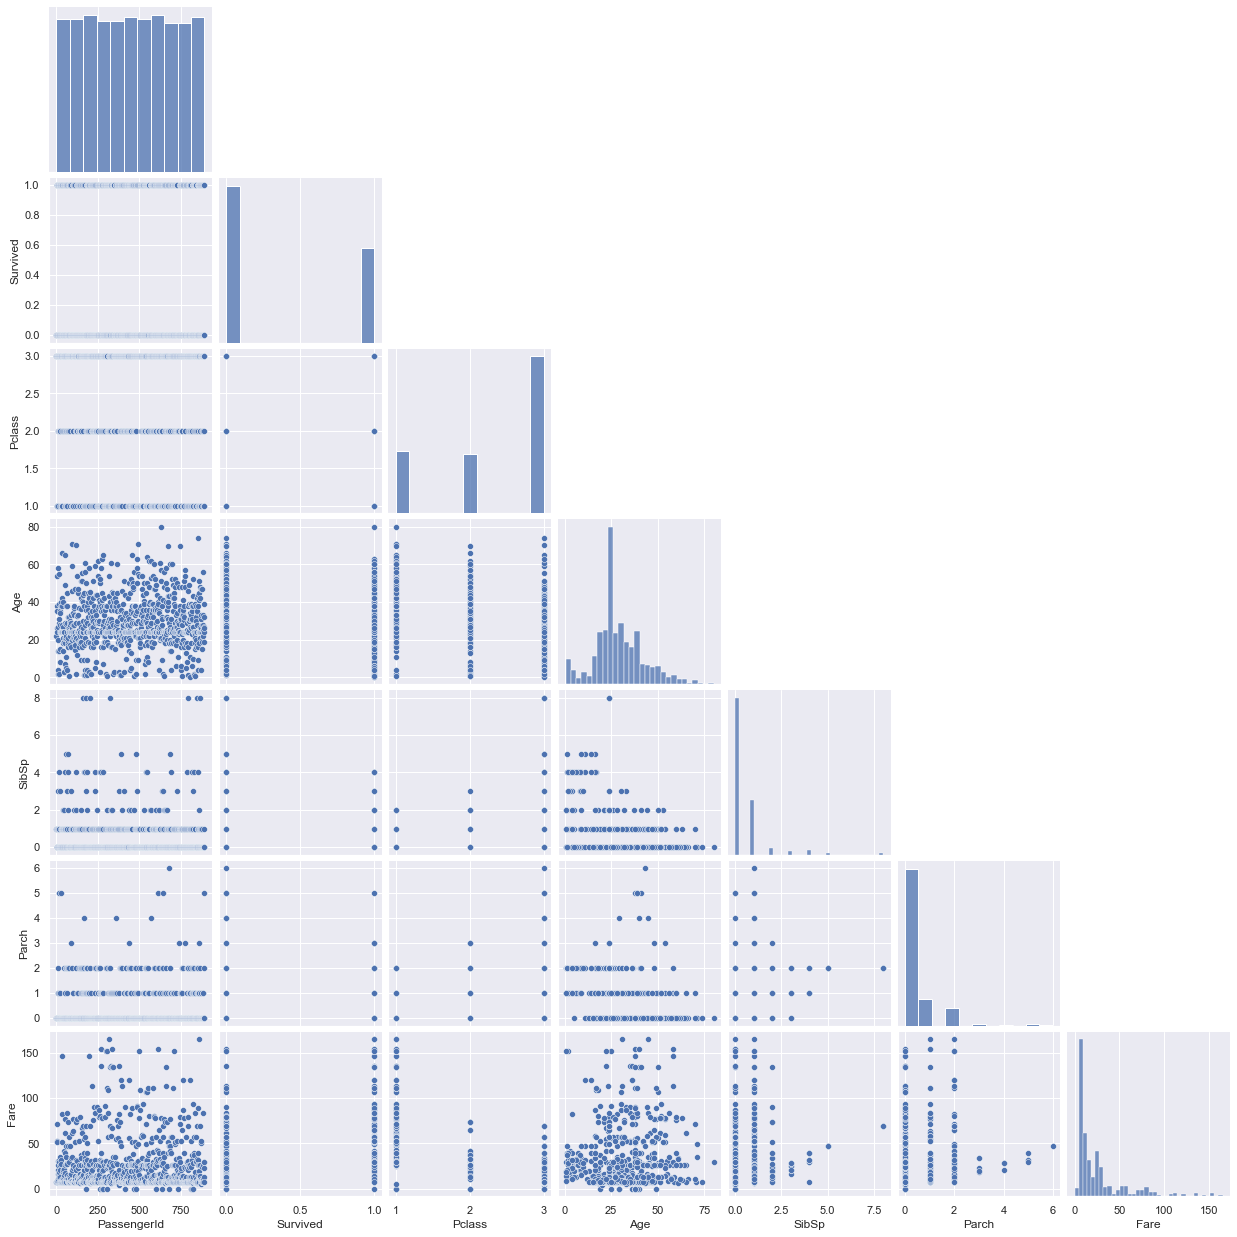

In [58]:
sns.pairplot(df_cleaned,corner=True)

In [59]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Stone, Mrs. George Nelson (Martha Evelyn)",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


DATA PREPROCESSING

In [64]:
df_needed=df_cleaned[['Survived','Pclass','Sex','Age','SibSp','Parch',
                     'Fare','Embarked']]
df_needed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [65]:
df_dummies=pd.get_dummies(df_needed,drop_first=True)

In [66]:
df_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [67]:
X_train=df_dummies.drop('Survived',axis=1)
Y_train=df_dummies['Survived']

In [68]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [69]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [70]:
import statsmodels.api as sm

from scipy import stats 
stats.chisqprob=lambda chisq,df:stats.chi2.sf(chisq,df)

In [71]:
x=sm.add_constant(X_train)
model=sm.Logit(Y_train,x)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.442218
         Iterations 6


In [73]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  869
Model:                          Logit   Df Residuals:                      860
Method:                           MLE   Df Model:                            8
Date:                Wed, 13 Oct 2021   Pseudo R-squ.:                  0.3316
Time:                        16:59:11   Log-Likelihood:                -384.29
converged:                       True   LL-Null:                       -574.96
Covariance Type:            nonrobust   LLR p-value:                 1.823e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3636      0.663      8.094      0.000       4.065       6.662
Pclass        -1.1344      0.171     -6.616      0.000      -1.470      -0.798
Age           -0.0442      0.008     -5.316      0.000      -0.060      -0.028
SibSp         -0.3735      0.116     -3.229      0.001      -0.600      -0.147
Parch         -0.0786      0.123     -0.638      0.524      -0.320       0.163
Fare           0.0056      0.005      1.112      0.266      -0.004       0.015
Sex_male      -2.6715      0.204    -13.122      0.000      -3.071      -2.272
Embarked_Q    -0.1100      0.382     -0.288      0.773      -0.859       0.639
Embarked_S    -0.3902      0.241     -1.617      0.106      -0.863       0.083
==============================================================================
"""

removing predictor with p value higher than 005 (according to backward elimination rule )

In [74]:
X_=X_train.drop(X_train[['Embarked_Q','Embarked_S']],axis=1)

In [75]:
X_.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [77]:
x1=sm.add_constant(X_)
model=sm.Logit(Y_train,x1)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.443961
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  869
Model:                          Logit   Df Residuals:                      862
Method:                           MLE   Df Model:                            6
Date:                Wed, 13 Oct 2021   Pseudo R-squ.:                  0.3290
Time:                        17:29:36   Log-Likelihood:                -385.80
converged:                       True   LL-Null:                       -574.96
Covariance Type:            nonrobust   LLR p-value:                 1.276e-78
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0448      0.630      8.005      0.000       3.810       6.280
Pclass        -1.1163      0.167     -6.665      0.000      -1.445      -0.788
Age           -0.0449      0.008     -5.404      0.000      -0.061      -0.029
SibSp         -0.3997      0.115     -3.469      0.001      -0.625      -0.174
Parch         -0.0946      0.122     -0.778      0.437      -0.333       0.144
Fare           0.0072      0.005      1.441      0.149      -0.003       0.017
Sex_male      -2.6976      0.202    -13.375      0.000      -3.093      -2.302
==============================================================================
"""

In [80]:
X_trial=X_.drop('Parch',axis=1)

In [82]:
x2=sm.add_constant(X_trial)
model=sm.Logit(Y_train,x2)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.444313
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  869
Model:                          Logit   Df Residuals:                      863
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Oct 2021   Pseudo R-squ.:                  0.3285
Time:                        17:31:12   Log-Likelihood:                -386.11
converged:                       True   LL-Null:                       -574.96
Covariance Type:            nonrobust   LLR p-value:                 1.887e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0679      0.630      8.049      0.000       3.834       6.302
Pclass        -1.1386      0.165     -6.893      0.000      -1.462      -0.815
Age           -0.0447      0.008     -5.391      0.000      -0.061      -0.028
SibSp         -0.4181      0.113     -3.695      0.000      -0.640      -0.196
Fare           0.0062      0.005      1.298      0.194      -0.003       0.016
Sex_male      -2.6673      0.197    -13.514      0.000      -3.054      -2.280
==============================================================================
"""

In [83]:
X_final=X_trial.drop('Fare',axis=1)

In [85]:
x3=sm.add_constant(X_final)
model=sm.Logit(Y_train,x3)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.445317
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  869
Model:                          Logit   Df Residuals:                      864
Method:                           MLE   Df Model:                            4
Date:                Wed, 13 Oct 2021   Pseudo R-squ.:                  0.3269
Time:                        17:32:36   Log-Likelihood:                -386.98
converged:                       True   LL-Null:                       -574.96
Covariance Type:            nonrobust   LLR p-value:                 4.336e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5294      0.525     10.537      0.000       4.501       6.558
Pclass        -1.2726      0.131     -9.736      0.000      -1.529      -1.016
Age           -0.0450      0.008     -5.464      0.000      -0.061      -0.029
SibSp         -0.3666      0.105     -3.478      0.001      -0.573      -0.160
Sex_male      -2.6946      0.196    -13.726      0.000      -3.079      -2.310
==============================================================================
"""

Building the Model

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logmodel=LogisticRegression()

In [89]:
logmodel.fit(X_final,Y_train)

LogisticRegression()

In [90]:
logmodel.fit(X_final,Y_train)

LogisticRegression()

Preparing the test data before using it

In [92]:
df_test=pd.read_csv('Titanic/test.csv')

In [93]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [95]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [96]:
df_test['Age']=df_test[['Age','Pclass']].apply(f,axis=1)

In [97]:
df_test_needed=df_test[['Pclass', 'Sex', 'Age', 'SibSp']]
df_test_needed.head()

,Pclass,Sex,Age,SibSp
0,3,male,34.5,0
1,3,female,47.0,1
2,2,male,62.0,0
3,3,male,27.0,0
4,3,female,22.0,1


In [98]:
df_test_needed.describe()

,Pclass,Age,SibSp
count,418.000000,418.000000,418.000000
mean,2.265550,29.343301,0.447368
std,0.841838,12.917718,0.896760
min,1.000000,0.170000,0.000000
25%,1.000000,23.000000,0.000000
50%,3.000000,25.000000,0.000000
75%,3.000000,36.375000,1.000000
max,3.000000,76.000000,8.000000


In [99]:
x_test_dummies=pd.get_dummies(df_test_needed,drop_first=True)

In [100]:
x_test_dummies.head()

,Pclass,Age,SibSp,Sex_male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,1,0


Getting the prdictions

In [101]:
predictions=logmodel.predict(x_test_dummies)

In [102]:
pred=pd.DataFrame(predictions,columns=['pred'])

In [103]:
pred.head()

,pred
0,0
1,0
2,0
3,0
4,1


Evaluating the predictions

In [107]:
sub=pd.read_csv('Titanic/gender_submission.csv')

In [108]:
sub_compare=sub.copy()

In [109]:
sub_compare['predictions']=predictions

In [110]:
sub_compare.tail(20)

,PassengerId,Survived,predictions
398,1290,0,0
399,1291,0,0
400,1292,1,1
401,1293,0,0
402,1294,1,1
403,1295,0,1
404,1296,0,0
405,1297,0,0
406,1298,0,0
407,1299,0,0


In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [112]:
sub_compare.columns

Index(['PassengerId', 'Survived', 'predictions'], dtype='object')

In [113]:
confusion_matrix(sub_compare['Survived'],pred)

array([[252,  14],
       [ 12, 140]], dtype=int64)

In [114]:
final_result=pd.DataFrame(confusion_matrix(sub_compare['Survived'],pred),index=[['actual no','actual yes']],columns=[['predicted No' ,'predicted yes']])

In [115]:
final_result

,predicted No,predicted yes
actual no,252,14
actual yes,12,140


In [116]:
classification_report(sub_compare['Survived'],pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95       266\n           1       0.91      0.92      0.92       152\n\n    accuracy                           0.94       418\n   macro avg       0.93      0.93      0.93       418\nweighted avg       0.94      0.94      0.94       418\n'

In [118]:
Final_submission=sub_compare.drop('Survived',axis=1)
Final_submission.to_csv('my _submission',index=False)

END